In [1]:
import sys  
sys.path.append('../models/')
import ExampleModels as em
import torchvision
from torchvision import transforms
import torch

In [2]:
def get_dataset():
    data_dir = '../dataset'
    train_dataset = torchvision.datasets.MNIST(data_dir, train=True, download=True)
    test_dataset  = torchvision.datasets.MNIST(data_dir, train=False, download=True)
    train_transform = transforms.Compose([
        transforms.ToTensor(),
    ])

    test_transform = transforms.Compose([
        transforms.ToTensor(),
    ])

    train_dataset.transform = train_transform
    test_dataset.transform = test_transform

    m=len(train_dataset)

    #train_data, val_data = random_split(train_dataset, [int(m-m*0.2), int(m*0.2)])
    batch_size=32

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
    #valid_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,shuffle=True)
    
    return train_dataset, test_dataset, train_loader, test_loader

train_dataset, test_dataset, train_loader, test_loader = get_dataset()

In [3]:
# train distribution scaled model and evaluate
max_embed_size = 60
min_p = 0.2
ae = em.MNISTAutoEncoder(max_embed_size,use_sq_dr= True,dr_min_p= min_p, scale_output=True)

num_epochs = 80
diz_loss = {'train_loss':[],'val_loss':[]}
for epoch in range(num_epochs):
    train_loss =ae.train_epoch(train_loader)
    val_loss = ae.test_epoch(test_loader)
    print('EPOCH {}/{} \t train loss {} \t val loss {}'.format(epoch + 1, num_epochs,train_loss,val_loss))
    diz_loss['train_loss'].append(float(train_loss))
    diz_loss['val_loss'].append(float(val_loss))

Selected device: cuda
EPOCH 1/80 	 train loss 0.04822133108973503 	 val loss 0.026266038417816162
EPOCH 2/80 	 train loss 0.017274389043450356 	 val loss 0.01662355288863182
EPOCH 3/80 	 train loss 0.014195230789482594 	 val loss 0.014954126439988613
EPOCH 4/80 	 train loss 0.012943040579557419 	 val loss 0.014093226753175259
EPOCH 5/80 	 train loss 0.012256573885679245 	 val loss 0.014544190838932991
EPOCH 6/80 	 train loss 0.011595702730119228 	 val loss 0.012817364186048508
EPOCH 7/80 	 train loss 0.01119985245168209 	 val loss 0.012347044423222542
EPOCH 8/80 	 train loss 0.010914578102529049 	 val loss 0.012399966828525066
EPOCH 9/80 	 train loss 0.01056552492082119 	 val loss 0.012153882533311844
EPOCH 10/80 	 train loss 0.010292533785104752 	 val loss 0.011070570908486843
EPOCH 11/80 	 train loss 0.010088139213621616 	 val loss 0.010547248646616936
EPOCH 12/80 	 train loss 0.009921266697347164 	 val loss 0.010367180220782757
EPOCH 13/80 	 train loss 0.009660801850259304 	 val los

In [4]:
# train a normal model and evaluate

#max_embed_size = 40
#min_p = 0.2
ae = em.MNISTAutoEncoder(max_embed_size,use_sq_dr= True,dr_min_p= min_p, scale_output=False)

#num_epochs = 30
niz_loss = {'train_loss':[],'val_loss':[]}
for epoch in range(num_epochs):
    train_loss =ae.train_epoch(train_loader)
    val_loss = ae.test_epoch(test_loader)
    print('EPOCH {}/{} \t train loss {} \t val loss {}'.format(epoch + 1, num_epochs,train_loss,val_loss))
    niz_loss['train_loss'].append(float(train_loss))
    niz_loss['val_loss'].append(float(val_loss))

Selected device: cuda
EPOCH 1/80 	 train loss 0.0454668253660202 	 val loss 0.02696782723069191
EPOCH 2/80 	 train loss 0.019952066242694855 	 val loss 0.01930816099047661
EPOCH 3/80 	 train loss 0.014835481531918049 	 val loss 0.015493033453822136
EPOCH 4/80 	 train loss 0.013043137267231941 	 val loss 0.014559116214513779
EPOCH 5/80 	 train loss 0.011979618109762669 	 val loss 0.012709003873169422
EPOCH 6/80 	 train loss 0.011354124173521996 	 val loss 0.01243202481418848
EPOCH 7/80 	 train loss 0.011043540202081203 	 val loss 0.011933810077607632
EPOCH 8/80 	 train loss 0.010669141076505184 	 val loss 0.01247431617230177
EPOCH 9/80 	 train loss 0.01047266274690628 	 val loss 0.01134839840233326
EPOCH 10/80 	 train loss 0.010240917094051838 	 val loss 0.01101643219590187
EPOCH 11/80 	 train loss 0.009952828288078308 	 val loss 0.010875607840716839
EPOCH 12/80 	 train loss 0.009774032980203629 	 val loss 0.01013777032494545
EPOCH 13/80 	 train loss 0.00953249353915453 	 val loss 0.010

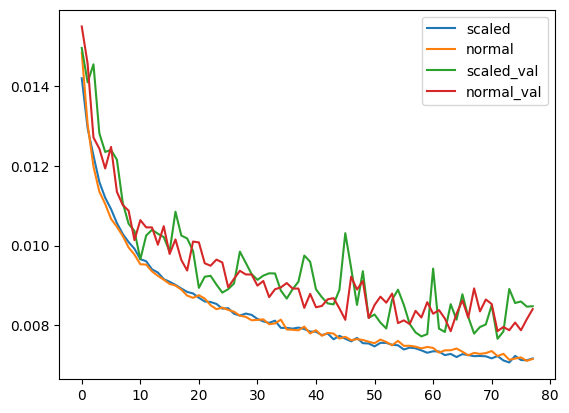

In [5]:
import matplotlib.pyplot as plt
start = 2
plt.plot(diz_loss['train_loss'][start:],label='scaled')
plt.plot(niz_loss['train_loss'][start:],label='normal')
plt.plot(diz_loss['val_loss'][start:],label='scaled_val')
plt.plot(niz_loss['val_loss'][start:],label='normal_val')
plt.legend()
plt.show()

In [ ]:
#TODO eval scaled on abblated data- compare to normal

# TODO eval a normal autoencoder with abblated data